In [ ]:
#Loading the model

import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the same CNN model structure as before
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model
model = CNN()

# Load the saved model state
model.load_state_dict(torch.load('/content/mnist_cnn.pth', map_location=torch.device('cpu')))
model.eval()  # Set model to evaluation mode

print("Model successfully loaded!")

Model successfully loaded!


In [ ]:
#!pip install --upgrade sympy

In [ ]:
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader


# Load the MNIST dataset again
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
##transforms.Normalize((0.5,), (0.5,) should be removed
## since model wasnt trained on normalised images but accuracy dropped to 6% for e = 0.3 ?????
## its better to have normalisation but will have to re train model and update all notebooks
## will do that later, choosing to stay consistent for now
testset = MNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=1, shuffle=False)

# Get one test image
dataiter = iter(testloader)
image, label = next(dataiter)

100%|██████████| 9.91M/9.91M [00:00<00:00, 49.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.75MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.87MB/s]


In [ ]:

# Ensure image requires gradient
image.requires_grad = True

# Forward pass
output = model(image)

# Compute loss
lossfn = torch.nn.CrossEntropyLoss()
loss = lossfn(output, label)

# Backward pass
loss.backward()  # No need for retain_graph=True unless reusing graph

# Get the gradient of the image
grad = image.grad
print(grad)


tensor([[[[-1.4338e-10, -3.4037e-09, -9.4901e-09, -1.4132e-08, -1.0004e-08,
           -9.1255e-09, -1.4678e-08, -1.7095e-08, -7.9321e-09, -8.6187e-09,
           -1.4267e-08, -2.0145e-08, -1.2447e-08, -1.2059e-08, -1.1662e-08,
           -6.8374e-09, -1.2915e-09, -7.9923e-09, -1.0169e-08, -1.3962e-08,
           -5.9578e-09, -1.1158e-08, -2.0177e-08, -2.3100e-08, -1.6101e-08,
           -7.6171e-09, -8.2622e-09, -2.5558e-09],
          [ 1.7788e-09,  9.3943e-09,  5.0160e-09,  3.3854e-08,  2.1566e-08,
            4.2115e-08,  4.5291e-09,  3.2250e-08, -3.5968e-08,  6.2161e-09,
           -3.6512e-08,  5.1814e-09, -2.1512e-09,  1.2282e-08, -4.7683e-10,
            1.0482e-08,  2.5194e-09,  1.0565e-08,  2.4952e-09,  1.0561e-08,
            4.7496e-09,  2.3430e-08,  1.1720e-08,  2.9075e-08,  9.8915e-09,
            1.1644e-08,  2.5208e-09,  2.0154e-09],
          [ 3.9688e-10, -3.2094e-09, -1.4157e-10,  8.2512e-10,  3.8007e-09,
           -9.4824e-09,  1.8388e-09, -2.4169e-08, -8.2404e-09,

In [ ]:
#### Normalisation params fix and scaling fix
mean= 0.5
std=0.5
min_val = (0.0 - mean) / std  # = -1.0
max_val = (1.0 - mean) / std  # = 1.0

In [ ]:
# trying FGSM
epsilon = 0.1 #noise factor
epsilon_scaled = epsilon / std # need to scale epsilon due to normalisation
perturbation = epsilon_scaled * grad.sign() # taking the sign of gradients
adversarial_image = image + perturbation # adding perturbation to the original image
adversarial_image = torch.clamp(adversarial_image, min_val, max_val) # clipping the image to be between min_val and max_val

In [ ]:
# Seeing the difference in tensors
print("Original Image:", image)
print("Perturbation:", perturbation)
print("Adversarial Image:", adversarial_image)

Original Image: tensor([[[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000,

In [ ]:
adversarial_output = model(adversarial_image)
predicted_label = torch.argmax(adversarial_output)
print("Predicted Label:", predicted_label.item())
print("Original Label:", label.item())

# epsilon 0.1 was too weak it seems pred and original both are 3 (same)

Predicted Label: 17
Original Label: 7


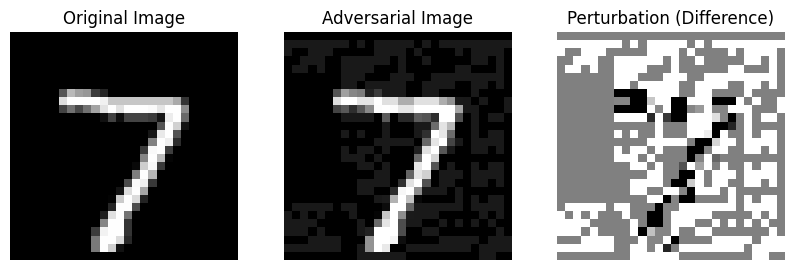

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convert images from tensor to numpy
orig_image_np = image.squeeze().detach().cpu().numpy()  # Remove batch & move to CPU
adv_image_np = adversarial_image[0].squeeze().detach().cpu().numpy()  # Same for adversarial image
perturbation = adv_image_np - orig_image_np  # Compute the actual noise

# Plot all three: Original, Adversarial, Perturbation
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(orig_image_np, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(adv_image_np, cmap="gray")
axes[1].set_title("Adversarial Image")
axes[1].axis("off")

axes[2].imshow(perturbation, cmap="gray")
axes[2].set_title("Perturbation (Difference)")
axes[2].axis("off")

plt.show()


In [ ]:
# trying FGSM again
epsilon = 0.3 #noise factor
epsilon_scaled = epsilon / std # need to scale epsilon due to normalisation

perturbation = epsilon_scaled * grad.sign() # taking the sign of gradients
adversarial_image = image + perturbation # adding perturbation to the original image
adversarial_image = torch.clamp(adversarial_image, min_val, max_val) # clipping the image to be between 0 and 1

In [ ]:
adversarial_output = model(adversarial_image)
predicted_label = torch.argmax(adversarial_output)
print("Predicted Label:", predicted_label.item())
print("Original Label:", label.item())


Predicted Label: 87
Original Label: 7


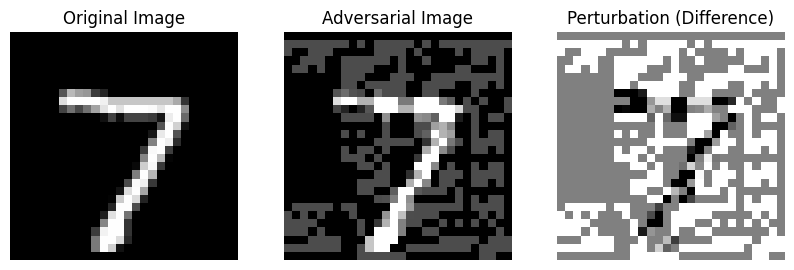

In [ ]:
# Convert images from tensor to numpy
orig_image_np = image.squeeze().detach().cpu().numpy()  # Remove batch & move to CPU

# Access the first image from the batch for adversarial image before squeezing
adv_image_np = adversarial_image[0].squeeze().detach().cpu().numpy()  # Same for adversarial image
perturbation = adv_image_np - orig_image_np  # Compute the actual noise

# Plot all three: Original, Adversarial, Perturbation
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

axes[0].imshow(orig_image_np, cmap="gray")
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(adv_image_np, cmap="gray")
axes[1].set_title("Adversarial Image")
axes[1].axis("off")

axes[2].imshow(perturbation, cmap="gray")
axes[2].set_title("Perturbation (Difference)")
axes[2].axis("off")

plt.show()

In [ ]:
# Single for loop for all epsilons

# Now, Ill try to make the test set FGSM adversarial and see how the performance drops


from torch.utils.data import TensorDataset, DataLoader

epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracies = []

for epsilon in epsilons:
  epsilon_scaled = epsilon / std # need to scale epsilon due to normalisation
  testloader2 = DataLoader(testset, batch_size=64, shuffle=False) #loading 64 imgs in a batch

  #images will now be a tensor of shape (64, 1, 28, 28), meaning 64 images each of size 1x28x28 (grayscale).
  #labels will be a tensor of shape (64,), containing 64 labels.
  
  # Reset lists for each epsilon
  adv_examples = []
  true_labels = []

  # Loop through all test batches
  for images, labels in testloader2:
    #Ensuring imgs need gradient
    images.requires_grad = True

    #  Forward pass
    outputs = model(images)

    # Compute loss for entire batch
    lossfn = torch.nn.CrossEntropyLoss()
    loss = lossfn(outputs, labels)

    # Backward pass
    model.zero_grad()   #resets (clears) the gradients of all model parameters in PyTorch. This is necessary before calling backward() to prevent accumulation from previous iterations.
    loss.backward()

    # Get the sign of the gradients for all images in the batch
    grad = images.grad.sign()

    # Generate adversarial examples for the entire batch
    adv_images = images + epsilon_scaled * grad
    adv_images = torch.clamp(adv_images, min_val, max_val)  # Keep values in valid range

    # Store adversarial examples & labels
    adv_examples.append(adv_images.detach())
    true_labels.append(labels.detach())


  # Concatenate all batches into one tensor
  adv_examples = torch.cat(adv_examples, dim=0)
  true_labels = torch.cat(true_labels, dim=0)

  # Wrap adversarial examples and labels in a dataset
  adv_dataset = TensorDataset(adv_examples, true_labels)

  # Create DataLoader for adversarial examples
  adv_testloader = DataLoader(adv_dataset, batch_size=64, shuffle=False)

  correct = 0
  total = 0

  with torch.no_grad():
    for images, labels in adv_testloader:
      outputs = model(images)
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  accuracy_adv = 100 * correct / total
  print(f'Accuracy of the model on the adversarial test set with epsilon = {epsilon}: {accuracy_adv:.2f}%')
  accuracies.append(accuracy_adv)


Accuracy of the model on the adversarial test set with epsilon = 0.1: 84.36%
Accuracy of the model on the adversarial test set with epsilon = 0.2: 40.78%
Accuracy of the model on the adversarial test set with epsilon = 0.3: 16.43%
Accuracy of the model on the adversarial test set with epsilon = 0.4: 9.30%
Accuracy of the model on the adversarial test set with epsilon = 0.5: 7.31%
Accuracy of the model on the adversarial test set with epsilon = 0.6: 7.92%
Accuracy of the model on the adversarial test set with epsilon = 0.7: 9.28%
Accuracy of the model on the adversarial test set with epsilon = 0.8: 11.15%
Accuracy of the model on the adversarial test set with epsilon = 0.9: 13.18%


In [ ]:
"""
 At epsilon=0.5 (pixel space), scaled epsilon is 1.0 in normalized space. Perturbations at this point are exactly at the clamping limit.
 Any epsilon beyond that (like 0.6 to 0.9) would be clamped, so the actual perturbation isn't increasing beyond 1.0 in normalized space.
 That's why from epsilon=0.5 onwards, the accuracy doesn't drop much and even fluctuates slightly.
 It's because the effective perturbation isn't increasing anymore due to clamping.
"""

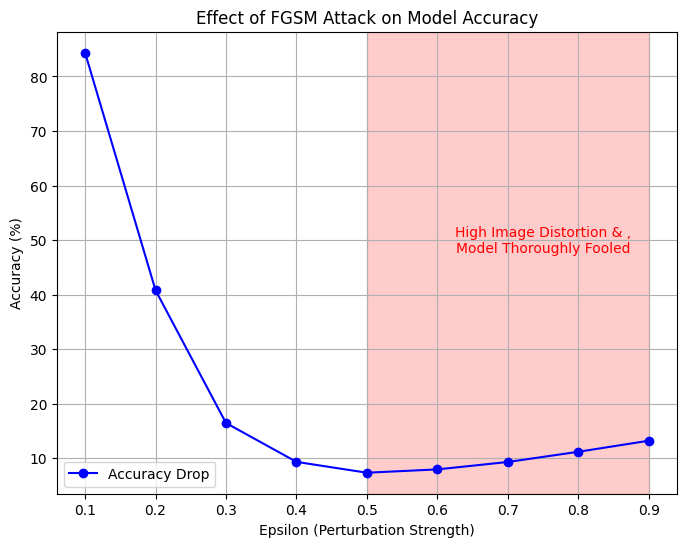

In [ ]:
import matplotlib.pyplot as plt

# Epsilon values and corresponding accuracy from our results
#epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#accuracies = [90.77, 80.37, 64.93, 47.02, 31.67, 22.51, 17.88, 16.32, 16.22]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(epsilons, accuracies, marker='o', linestyle='-', color='b', label="Accuracy Drop")

# Labels and Title
plt.xlabel("Epsilon (Perturbation Strength)")
plt.ylabel("Accuracy (%)")
plt.title("Effect of FGSM Attack on Model Accuracy")
plt.xticks(epsilons)
plt.grid(True)
plt.legend()

# Highlight distortion region (using a shaded region)
plt.axvspan(0.5, 0.9, color='red', alpha=0.2, label="Model Thoroughly Fooled")
plt.text(0.75, 50, 'High Image Distortion & ,\nModel Thoroughly Fooled', color='red', ha='center', va='center')

# Display the plot
plt.show()